In [106]:
import matplotlib.pyplot as plt
import pandas
import random
import os
import cv2

from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, Dense, Activation
from sklearn.model_selection import train_test_split

In [107]:
filenames = os.listdir("train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pandas.DataFrame({
    'filename': filenames,
    'category': categories
})

In [108]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [109]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [110]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [111]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [112]:
train_augment = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_data_generator = train_augment.flow_from_dataframe(
    train_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [113]:
validation_augment = ImageDataGenerator(rescale=1./255)

validation_data_generator = validation_augment.flow_from_dataframe(
    validate_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [99]:
epochs = 15
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
)
model.save("model.h5")

Epoch 1/15
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 87s 65ms/step - accuracy: 0.7072 - loss: 0.5832 - val_accuracy: 0.7243 - val_loss: 0.6047
Epoch 2/15
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 43s 32ms/step - accuracy: 0.7340 - loss: 0.5505 - val_accuracy: 0.7623 - val_loss: 0.4923
Epoch 3/15
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 87s 65ms/step - accuracy: 0.7402 - loss: 0.5378 - val_accuracy: 0.7709 - val_loss: 0.4741
Epoch 4/15
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 45s 34ms/step - accuracy: 0.7547 - loss: 0.5249 - val_accuracy: 0.7293 - val_loss: 0.5637
Epoch 5/15
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 90s 67ms/step - accuracy: 0.7509 - loss: 0.5099 - val_accuracy: 0.7655 - val_loss: 0.4752
Epoch 6/15
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - accuracy: 0.7659 - loss: 0.4964 - val_accuracy: 0.7754 - val_loss: 0.4937
Epoch 7/15
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 87s 65ms/step - accuracy: 0.7718 - loss: 0.4824 - val_accuracy: 0.7970 - val_loss: 0.4668
Epoch 8/15
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.7840 -

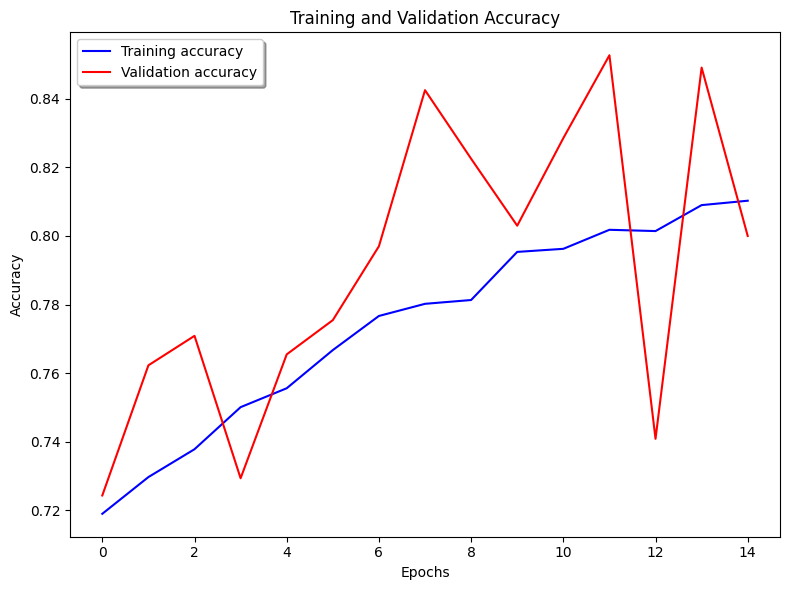

In [100]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax.plot(history.history['val_accuracy'], color='r', label="Validation accuracy")

legend = plt.legend(loc='best', shadow=True)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.tight_layout()
plt.show()

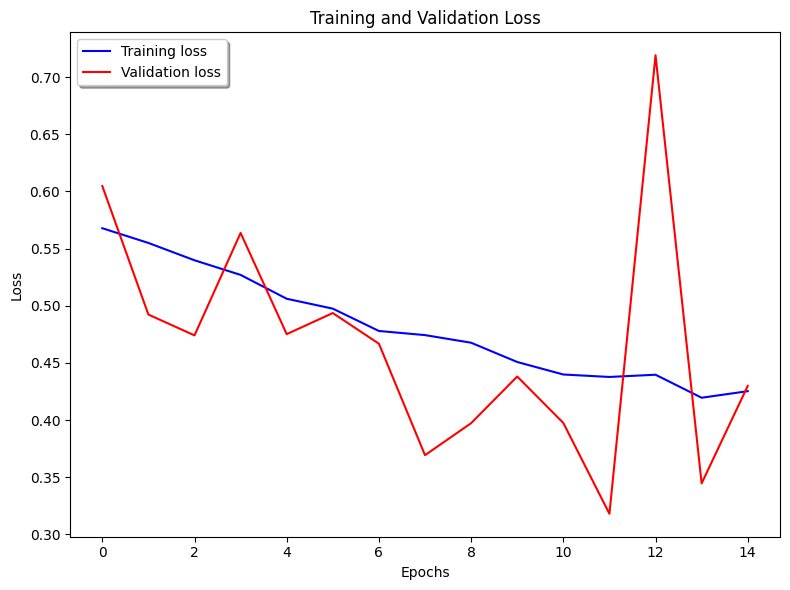

In [101]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(history.history['loss'], color='b', label="Training loss")
ax.plot(history.history['val_loss'], color='r', label="Validation loss")

legend = plt.legend(loc='best', shadow=True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.tight_layout()
plt.show()

# SKIP TO HERE (testing with test folder)

In [105]:
for i in range(10):
    all_test_images = os.listdir('test')
    random_image = random.choice(all_test_images)
    img = cv2.imread(f'test/{random_image}')
    img = cv2.resize(img,(128,128))
    
    org = img.copy()
    img = img.reshape(1,128,128,3)
    
    pred = model.predict(img)
    print(['cat','dog'][int(pred[0][0])])
    cv2.imshow('Live predictions',org)
    cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
cat


# SKIP TO HERE (testing with myTest folder)

In [104]:
for i in range(10):
    all_test_images = os.listdir('myTest')
    random_image = random.choice(all_test_images)
    img = cv2.imread(f'myTest/{random_image}')
    img = cv2.resize(img,(128,128))
    
    org = img.copy()
    img = img.reshape(1,128,128,3)
    
    pred = model.predict(img)
    print(['cat','dog'][int(pred[0][0])])
    cv2.imshow('Live predictions',org)
    cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
cat
